<a href="https://colab.research.google.com/github/Zahzull/dataset-datamining/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Stores.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [3]:
dataset

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


In [4]:
y

array([ 66490,  39820,  54010,  53730,  46620,  45260,  72240,  37720,
        46310,  44150,  71280,  57620,  60470,  59130,  66360,  78870,
        77250,  38170,  63540,  40190,  43460,  68890,  52780,  50680,
        41880,  70050,  25820,  60530,  78100,  84860,  80140,  14920,
        60460,  74560,  72430,  45460,  41570,  62870,  55170,  45480,
        49550,  48140,  67640,  39730,  35800,  49270,  66510,  62530,
        59980,  76350,  81820,  57830,  70450,  67000,  64090,  48670,
        66210,  83660,  70770,  53870,  71300,  46100,  49100,  65920,
        58660,  69130,  49080,  72710,  33430,  42430,  56650,  33580,
        67370,  71780,  84840,  82070,  26770,  65560,  38660,  65660,
        40700,  88910,  57860,  42670,  90180,  51280,  97260,  39650,
        45720,  42060,  65350,  67080,  54030,  56360,  77120,  50810,
        60960,  61180,  63660,  41190,  78420,  65580,  89080,  94170,
        50950,  65180,  69310,  79210,  23740,  36330,  51700,  62950,
      

In [5]:
X

array([[1961,  530],
       [1752,  210],
       [1609,  720],
       ...,
       [1436, 1060],
       [1560,  770],
       [1429, 1110]])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
X_train

array([[1982,  390],
       [1907,  680],
       [1584,  840],
       ...,
       [2264,  830],
       [1512, 1070],
       [1820,  310]])

In [8]:
y_test

array([ 51190,  71300,  65660,  14920,  64010,  85000,  72020,  70940,
        59290,  94460,  45580,  66050,  68890,  39740,  65750,  94170,
        61670,  38560,  76530,  52520,  66360,  55710,  84690,  73710,
        31890,  73660,  36560,  70610,  87220,  54610,  57910,  48540,
        84410,  58660,  36530,  43130,  46700,  56480,  68590,  55980,
        67520,  55990,  64780,  27970,  48670,  56880,  63300,  61180,
        25600,  79310,  90940,  53230,  69130,  73810,  39970,  40300,
        48950,  21300,  63540,  62470,  67360,  53890,  65560,  51320,
        51560,  51910,  78870,  66030,  26220,  68350,  46310,  53760,
        33730,  71830,  47230,  73080,  39420,  78090,  45160,  54690,
        72430,  67030,  50960,  59940,  93950,  60530,  85670,  80140,
        53270,  38280,  59190,  52990,  56610,  52160,  75110,  86830,
        71570,  46920,  54820,  66160,  47590,  48180,  59380,  93000,
        49510,  35420,  65580,  79180,  41910,  52340,  54590,  38600,
      

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
X_train

array([[ 0.63792733, -1.51564556],
       [ 0.38707465, -0.3987274 ],
       [-0.69326424,  0.2175033 ],
       ...,
       [ 1.58113342,  0.17898889],
       [-0.93408281,  1.10333495],
       [ 0.09608554, -1.82376091]])

In [12]:
y_test

array([ 51190,  71300,  65660,  14920,  64010,  85000,  72020,  70940,
        59290,  94460,  45580,  66050,  68890,  39740,  65750,  94170,
        61670,  38560,  76530,  52520,  66360,  55710,  84690,  73710,
        31890,  73660,  36560,  70610,  87220,  54610,  57910,  48540,
        84410,  58660,  36530,  43130,  46700,  56480,  68590,  55980,
        67520,  55990,  64780,  27970,  48670,  56880,  63300,  61180,
        25600,  79310,  90940,  53230,  69130,  73810,  39970,  40300,
        48950,  21300,  63540,  62470,  67360,  53890,  65560,  51320,
        51560,  51910,  78870,  66030,  26220,  68350,  46310,  53760,
        33730,  71830,  47230,  73080,  39420,  78090,  45160,  54690,
        72430,  67030,  50960,  59940,  93950,  60530,  85670,  80140,
        53270,  38280,  59190,  52990,  56610,  52160,  75110,  86830,
        71570,  46920,  54820,  66160,  47590,  48180,  59380,  93000,
        49510,  35420,  65580,  79180,  41910,  52340,  54590,  38600,
      

In [13]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
y_pred

array([70810, 39730, 39730, 81390, 52780, 50130, 73800, 59130, 59820,
       36280, 59130, 46580, 78100, 73800, 79410, 54060, 65890, 49590,
       60440, 81390, 73800, 39730, 63020, 60440, 79410, 46580, 81390,
       78130, 52780, 60440, 50130, 50130, 38530, 46580, 52780, 49590,
       63020, 39730, 54060, 59820, 63020, 81390, 69940, 49590, 73800,
       46580, 78130, 50130, 49720, 79780, 49590, 59130, 66390, 77120,
       70810, 59130, 79410, 56710, 60440, 63020, 36280, 49590, 60440,
       49170, 79780, 50130, 78100, 49170, 78130, 46580, 60440, 39730,
       60060, 59130, 38530, 39730, 54060, 43190, 52780, 78100, 60470,
       70810, 39730, 73800, 79410, 49590, 44400, 63020, 60440, 36280,
       59820, 79780, 81390, 54060, 81390, 79780, 43190, 39730, 62180,
       70810, 60440, 70810, 46580, 52780, 53940, 60440, 79780, 43190,
       39730, 65890, 78130, 70810, 79780, 56710, 81390, 59820, 41080,
       49590, 59820, 60440, 54060, 60440, 49590, 46580, 54060, 50130,
       54060, 36280,

In [16]:
y_test

array([ 51190,  71300,  65660,  14920,  64010,  85000,  72020,  70940,
        59290,  94460,  45580,  66050,  68890,  39740,  65750,  94170,
        61670,  38560,  76530,  52520,  66360,  55710,  84690,  73710,
        31890,  73660,  36560,  70610,  87220,  54610,  57910,  48540,
        84410,  58660,  36530,  43130,  46700,  56480,  68590,  55980,
        67520,  55990,  64780,  27970,  48670,  56880,  63300,  61180,
        25600,  79310,  90940,  53230,  69130,  73810,  39970,  40300,
        48950,  21300,  63540,  62470,  67360,  53890,  65560,  51320,
        51560,  51910,  78870,  66030,  26220,  68350,  46310,  53760,
        33730,  71830,  47230,  73080,  39420,  78090,  45160,  54690,
        72430,  67030,  50960,  59940,  93950,  60530,  85670,  80140,
        53270,  38280,  59190,  52990,  56610,  52160,  75110,  86830,
        71570,  46920,  54820,  66160,  47590,  48180,  59380,  93000,
        49510,  35420,  65580,  79180,  41910,  52340,  54590,  38600,
      

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


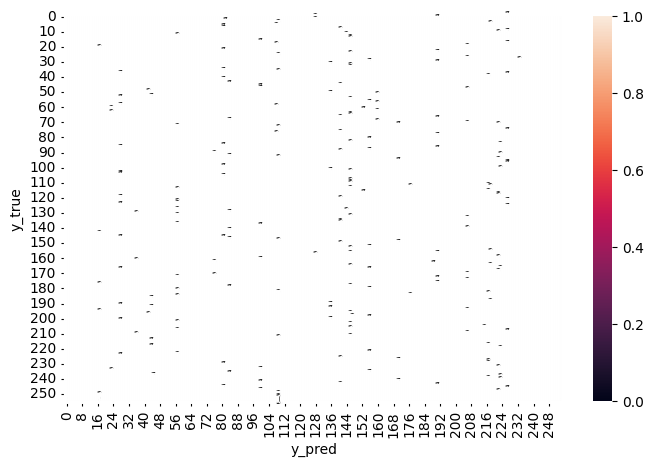

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

<ipython-input-19-1afe36a5fa4c>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


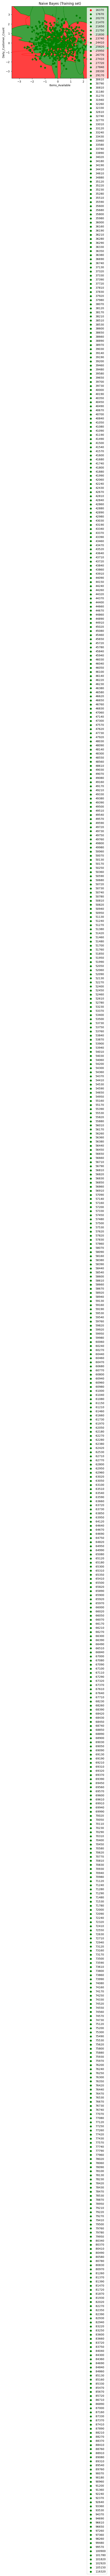

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Items_Available')
plt.ylabel('Daily_Customer_Count')
plt.legend()
plt.show()

<ipython-input-20-594ffa77b63f>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


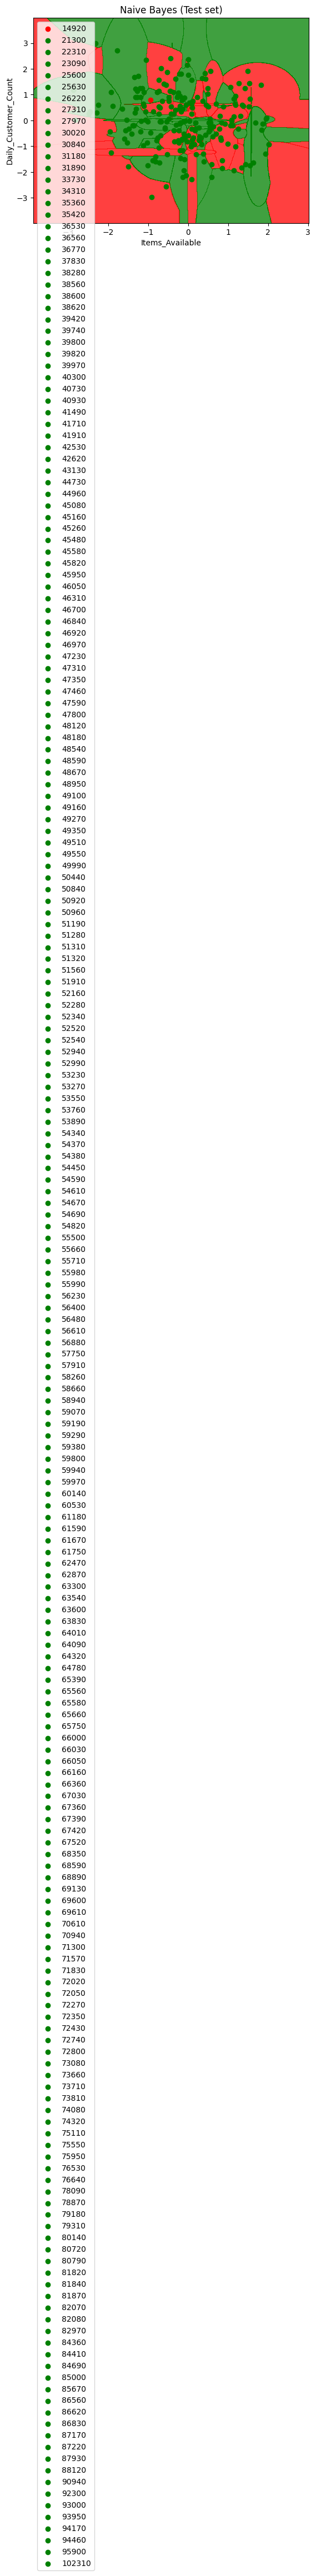

In [20]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Items_Available')
plt.ylabel('Daily_Customer_Count')
plt.legend()
plt.show()